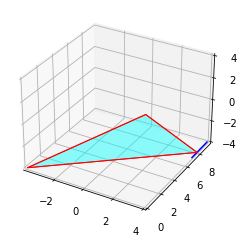

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
x1 = 4.00067
y1 = 0
z1 = 4.00689
x2 = -3.99553
y2 = 0
z2 = -3.9969
x3 = 4.01079
y3 = 7.90878
z3 = -3.99994
x4 = 4.00674
y4 = 0
z4 = 4.0036
x5 = -3.9915
y5 = 0
z5 = -3.99817
x6 = 4.00738
y6 = 7.90608
z6 = -3.99308
lx1 = 4.00009
ly1 = 9.56802
lz1 = -3.99604
lx2 = 4.00414
ly2 = 7.1046
lz2 = -4.0062
tri1 = [(x1, y1, z1), (x2, y2, z2), (x3, y3, z3)] 
tri2 = [(x4, y4, z4), (x5, y5, z5), (x6, y6, z6)] 

line_start = (lx1, ly1, lz1)
line_end = (lx2, ly2, lz2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

triangles = [tri1, tri2]
ax.add_collection3d(Poly3DCollection(triangles, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], [line_start[2], line_end[2]], color='blue')

min_x = min(x1, x2, x3, x4, x5, x6, lx1, lx2)
max_x = max(x1, x2, x3, x4, x5, x6, lx1, lx2)
min_y = min(y1, y2, y3, y4, y5, y6, ly1, ly2)
max_y = max(y1, y2, y3, y4, y5, y6, ly1, ly2)
min_z = min(z1, z2, z3, z4, z5, z6, lz1, lz2)
max_z = max(z1, z2, z3, z4, z5, z6, lz1, lz2)
ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])
ax.set_zlim([min_z, max_z])

plt.show()

In [2]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
def parse_logs(log_directory):
    contexts = {}
    for filename in os.listdir(log_directory):
        if filename.startswith("log_") and filename.endswith(".txt"):
            with open(os.path.join(log_directory, filename), 'r') as file:
                for line in file:
                    match = re.search(r"\[info\] \[(.*?)\] #dof: (\d+), #ele: (\d+)", line)
                    if match:
                        context = match.group(1)
                        dof = int(match.group(2))
                        ele = int(match.group(3))
                        if context not in contexts:
                            contexts[context] = {'DOF': dof, 'ELE': ele, 'times': {}}
                    time_match = re.search(r"\[info\] \[(.*?)\]<(.*?)> Time: ([\d.]+) milliseconds", line)
                    if time_match:
                        context = time_match.group(1)
                        phase = time_match.group(2)
                        time = float(time_match.group(3))
                        if phase not in contexts[context]['times']:
                            contexts[context]['times'][phase] = []
                        contexts[context]['times'][phase].append(time)
    return contexts
def calculate_averages(contexts):
    for context, data in contexts.items():
        for phase, times in data['times'].items():
            avg_time = np.mean(times)
            contexts[context]['times'][phase] = avg_time
    return contexts
def plot_data(contexts, phasesToPlot=None, title=""):
    phases_set = set()
    for context_data in contexts.values():
        phases_set.update(context_data['times'].keys())
    phases = sorted(list(phases_set))

    for metric in ['ELE', 'DOF']:
        # SET WIDTH AND HEIGHT OF FIGURE
        plt.rcParams["figure.figsize"] = (15, 8)
        plt.figure()
        for phase in phases:
            if phasesToPlot is not None and phase not in phasesToPlot:
                continue
            print(f"Plotting {phase} for {metric}")
            metrics = []
            times = []
            for context, data in contexts.items():
                if phase in data['times']:
                    metrics.append(data[metric])
                    times.append(data['times'][phase])
            sorted_data = sorted(zip(metrics, times))
            sorted_metrics, sorted_times = zip(*sorted_data)
            plt.plot(sorted_metrics, sorted_times, label=f"{phase}")
        
        plt.xlabel(f'Number of {metric}')
        plt.ylabel('Average Time (milliseconds)')
        plt.title(title)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Plotting CUDASolver for ELE
Plotting EigenSolver for ELE


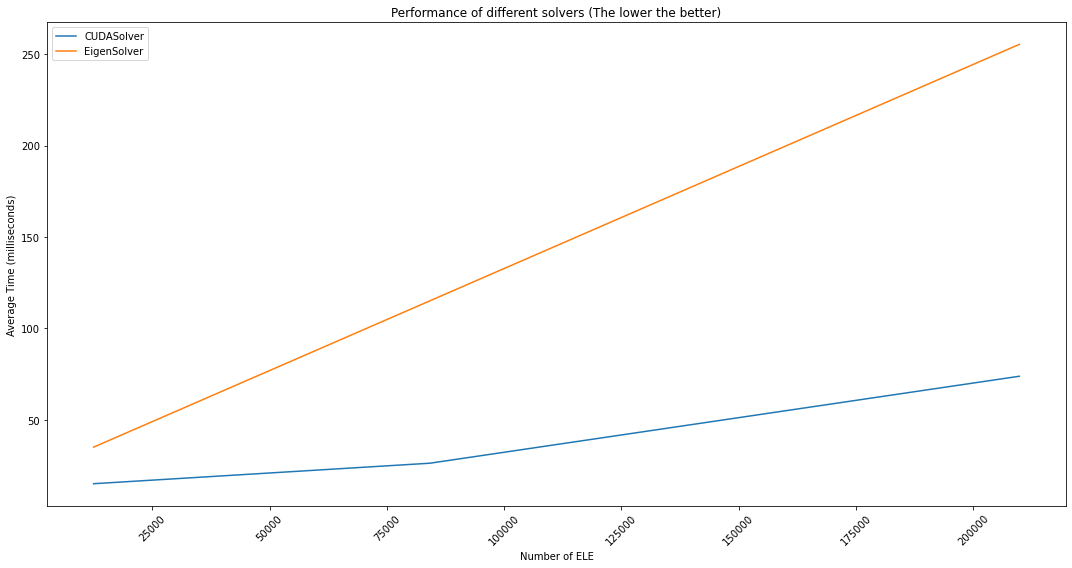

Plotting CUDASolver for DOF
Plotting EigenSolver for DOF


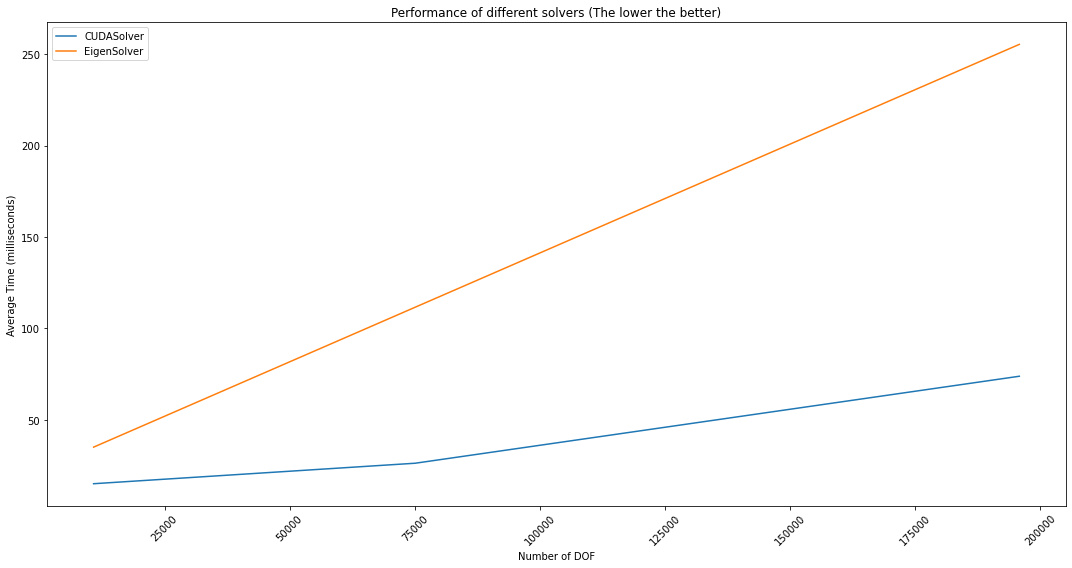

In [3]:
log_directory = "./Build/logs/used"
contexts = parse_logs(log_directory)
contexts = calculate_averages(contexts)
plot_data(contexts, phasesToPlot=['CUDASolver', 'EigenSolver'], title="Performance of different solvers (The lower the better)")


Plotting AtomicBVH construction for ELE
Plotting CooperativeBVH construction for ELE
Plotting SerialBVH construction for ELE


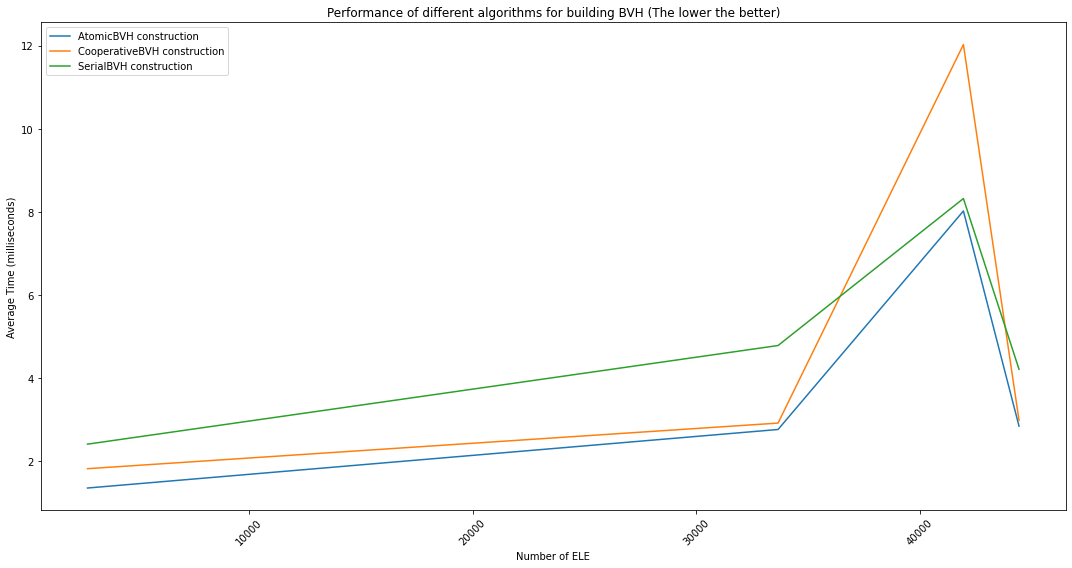

Plotting AtomicBVH construction for DOF
Plotting CooperativeBVH construction for DOF
Plotting SerialBVH construction for DOF


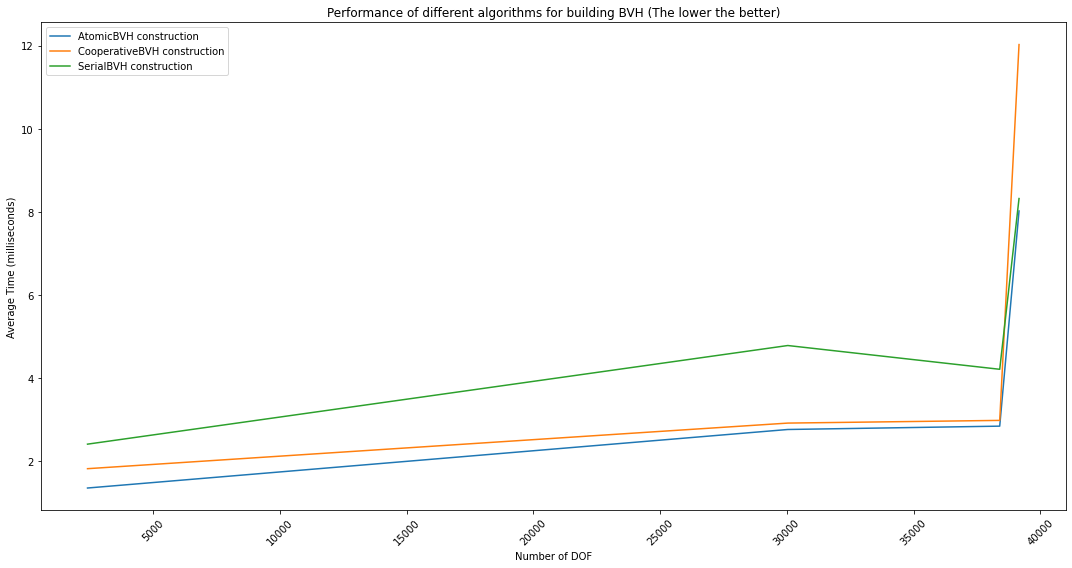

{'house&bunny': {'DOF': 2400,
  'ELE': 2778,
  'times': {'CUDASolver': 5.098572825287357,
   'SerialBVH construction': 2.4013259428571425,
   'Fixed objects collision handling': 0.022675886590038313,
   'AtomicBVH construction': 1.34462202247191,
   'CooperativeBVH construction': 1.8102925664488019}},
 'houses': {'DOF': 38400,
  'ELE': 44448,
  'times': {'CUDASolver': 47.981994068159686,
   'SerialBVH construction': 4.204681746192893,
   'Fixed objects collision handling': 0.017227528724440118,
   'AtomicBVH construction': 2.835020881789138,
   'CooperativeBVH construction': 2.9734912000000002}},
 'cube test': {'DOF': 30036,
  'ELE': 33668,
  'times': {'CUDASolver': 15.044822281405368,
   'SerialBVH construction': 4.777114188957055,
   'Fixed objects collision handling': 0.014938495193901226,
   'AtomicBVH construction': 2.7544431150442477,
   'CooperativeBVH construction': 2.9086387919876735}},
 'armadillo': {'DOF': 39162,
  'ELE': 41960,
  'times': {'CUDASolver': 13.765904917322041,


In [100]:
log_directory = "./Build/logs/"
contexts = parse_logs(log_directory)
contexts = calculate_averages(contexts)
plot_data(contexts, title="Performance of different algorithms for building BVH (The lower the better)",
          phasesToPlot=['AtomicBVH construction','CooperativeBVH construction','SerialBVH construction'])
contexts